In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
# Running Locally
price_df = pd.read_csv('hargaRumah.csv')

# Tipe Datanya : DataFrame (df)
print(type(price_df))
# Ukuran Data
N, P = price_df.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 936, ', Kolom = ', 10)

In [ ]:
# "Mengintip" beberapa data pertamanya
price_df.head(7)

# "Mengintip" beberapa data akhirnya
# price_df.tail(9)

# chosen at random
# price_df.sample(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000
6,7,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000


## Removing a variable(s)

In [ ]:
# mengecek kolom terlebih dahulu
price_df.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [ ]:
# Drop kolom pertama karena tidak berguna (hanya index)
price_df.drop("Observation", axis=1, inplace=True)

In [ ]:
price_df.columns

Index(['Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet', 'Builtup',
       'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

## Mengoreksi Tipe variabel

In [ ]:
# tipe data di setiap kolom
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [ ]:
price_df['Parking'] = price_df['Parking'].astype('category')
price_df['City_Category'] = price_df['City_Category'].astype('category')
price_df.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

## Removing Duplicate Data


In [ ]:
#mengecek apakah ada duplikat data?
print(price_df.shape)
price_df.duplicated().sum()

(936, 9)


4

In [ ]:
#menghapus entri yang memiliki data duplikat
price_df.drop_duplicates(inplace=True)
print(price_df.duplicated().sum()) # tidak ada lagi duplikat
print(price_df.shape) # periksa kembali dengan mencetak ukuran data

0
(932, 9)


## Variable Selection

In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_num = price_df.select_dtypes(include = ['float64', 'int64'])
price_num.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [ ]:
# Memilih hanya variable dengan tipe tertentu
price_cat = price_df.select_dtypes(include = ['category'])
price_cat.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


## Dasar Pengolahan variabel Kategorik: Dummy Variable

In [ ]:
# Jika variable bertype  kategori ingin diikut sertakan ke dalam bertype integer maka caranya seperti ini
df = pd.get_dummies(price_df['Parking'], prefix='Park')
df = df.astype(int)
df.head()

,Park_Covered,Park_No Parking,Park_Not Provided,Park_Open
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


## Menggabungkan dengan data awal (concat)

In [ ]:
# price_df adalah data awal
# df adalah data baru
# axis adalah menambahkan per kolom
df2 = pd.concat([price_df, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Dist_Taxi,9796.0,8294.0,11001.0,8301.0,10510.0
Dist_Market,5250.0,8186.0,14399.0,11188.0,12629.0
Dist_Hospital,10703.0,12694.0,16991.0,12289.0,13921.0
Carpet,1659.0,1461.0,1340.0,1451.0,1770.0
Builtup,1961.0,1752.0,1609.0,1748.0,2111.0
Parking,Open,Not Provided,Not Provided,Covered,Not Provided
City_Category,CAT B,CAT B,CAT A,CAT B,CAT B
Rainfall,530,210,720,620,450
House_Price,6649000,3982000,5401000,5373000,4662000
Park_Covered,0,0,0,1,0


## Memilih Data Secara Manual

In [ ]:
X = price_df[['House_Price','Dist_Market']]
X[:7]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0


## Outliers
## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

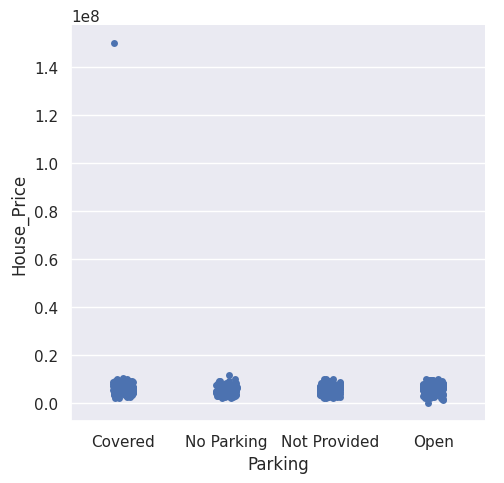

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price_df)

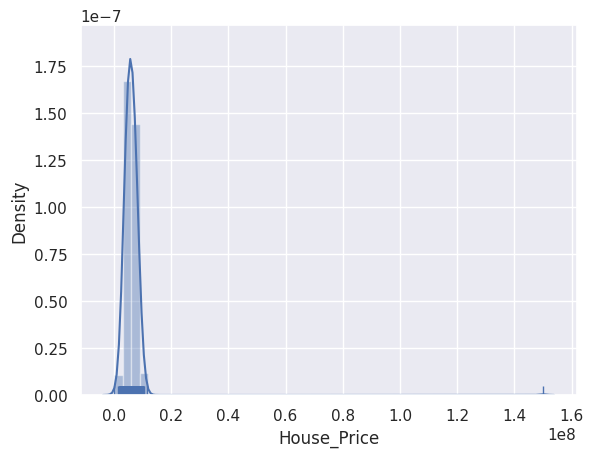

In [ ]:
# Distributions
p = sns.distplot(price_df['House_Price'], kde=True, rug=True)

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"
df = np.abs(price_df.House_Price - price_df.House_Price.mean())<=(2*price_df.House_Price.std())
print(df.shape)
df.head()

(932,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [ ]:
price_df2 = price_df[df] # Data tanpa outliers
print(price_df2.shape, price_df.shape)
# Data yang telah di remove outliernya
# disimpan dalam variabel baru "price_df2"

(931, 9) (932, 9)


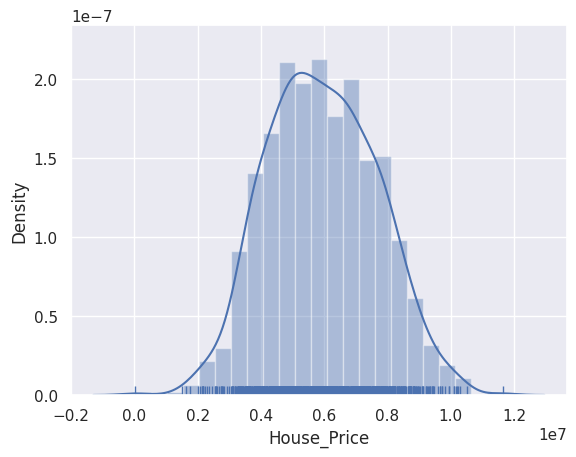

In [ ]:
# Distributions
p = sns.distplot(price_df2['House_Price'], kde=True, rug=True)

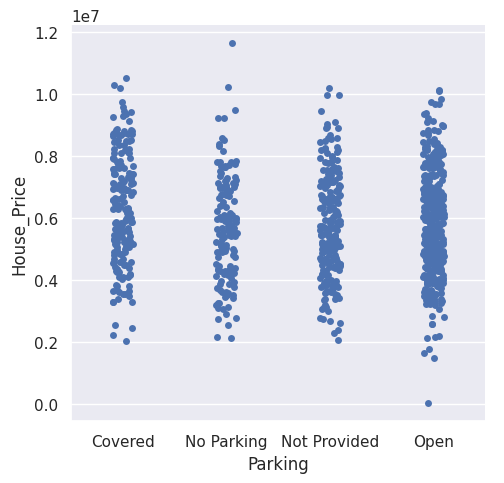

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price_df2)
# Dari catplot tersebut bisa disimpulkan bahwa jika diasumsikan luas tanah dan luas bangunan sama maka sepertinya ada indikasi bahwa tempat parkir tidak mempengaruhi harga rumahnya

## Missing Values

In [ ]:
print(price_df2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


In [ ]:
set(price_df2['Parking'])

{'Covered', 'No Parking', 'Not Provided', 'Open'}

## Gambaran yang Lebih baik tentang MV terutama di Big Data

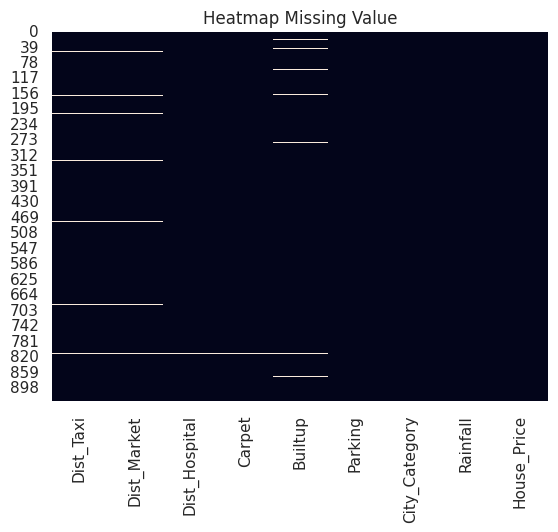

In [ ]:
sns.heatmap(price_df2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()
# melihat letak missing value ada dimana saja kalau datanya mising value tersebar maka jangan asal hapus

In [ ]:
# presentasi missing value
(price_df2.isnull().sum()/len(price_df2)).to_frame('persentase missing')

,persentase missing
Dist_Taxi,0.013963
Dist_Market,0.013963
Dist_Hospital,0.001074
Carpet,0.008593
Builtup,0.016112
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000


In [ ]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price_df.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price_df2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price_df2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price_df2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price_df2.dropna(inplace=True)

print(price_df2.isnull().sum())

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64


## Statistika Deskriptif

In [ ]:
price_df2.describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,8.970000e+02
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,970.000000,7.183000e+06
max,16850.000000,18281.000000,22407.000000,2229.000000,2667.000000,1560.000000,1.163200e+07


In [ ]:

price_df2.describe(include='all')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897,897,897.000000,8.970000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,353,347,NaN,NaN
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,NaN,NaN,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,NaN,NaN,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,NaN,NaN,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,NaN,NaN,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,NaN,NaN,970.000000,7.183000e+06


In [ ]:
# Distribusi tiap data
price_df2['Parking'].value_counts()

Parking
Open            353
Not Provided    223
Covered         180
No Parking      141
Name: count, dtype: int64

In [ ]:
# Two-Way Tables (contingency tables)
CT = pd.crosstab(index=price_df2["City_Category"], columns=price_df2["Parking"])
CT

Parking,Covered,No Parking,Not Provided,Open
City_Category,,,,
CAT A,72,50,80,115
CAT B,59,51,88,149
CAT C,49,40,55,89


## Saving (preprocessed) Data

In [ ]:
price_df2.to_csv("hargaRumah_PreProcessed.csv", encoding='utf8')